<a href="https://colab.research.google.com/github/sarthakbiswas97/ML-with-pyTorch-and-scikit-learn/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic

In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
  1.0,2.0,3.0,4.0
  5.0,6.0,,8.0
  10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
# this way we count the number of missing values per column
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [3]:
# access underlying numpy array
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [4]:
# eliminating training examples or features with missing values
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
# have a row with all values NaN)
df.dropna(how='all')

# drop rows that have fewer than 4 real values
df.dropna(thresh=4)

# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [7]:
# mean imputation

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [8]:
# pandas way of imputing missing value
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# Handling categorical data

In [9]:
# categorical data encoding with pandas
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class2'],
            ['red', 'L', 13.5, 'class1'],
            ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [10]:
# mapping ordinal features

size_mapping = {'XL':3,
                'L':2,
                'M':1
                }

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [11]:
# transform integer back to string values

inv_size_mapping = {v: k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


In [12]:
# encoding class labels
# class labels are not ordinal
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
# mapping dictionary to transform the class labels into integers
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [14]:
# reverse key:value pairs in the mapping dictionary
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [15]:
# using LabelEnoder from sklearn
# string labels into integers
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [16]:
# inverse of transform sklearn
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

# one-hot encoding on nominal features

In [17]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [18]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [19]:
# if we want to selectively transform columns in a multi-feature array
# we can use ColumnTransformer, which accepts a lis of
# (name, transformer, column(s))
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1,2])
])

c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [20]:
# easy way to get dummies
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


In [21]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [22]:
# in order to drop a redundant column via the OneHotEncoder,
# we need to set drop='first' and set categories='auto' as follows:

color_ohe = OneHotEncoder(categories='auto', drop='first')

c_transf = ColumnTransformer([('onehot', color_ohe, [0]),
                              ('nothing', 'passthrough', [1, 2])
                              ])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [23]:
#

df = pd.DataFrame([['green', 'M', 10.1,
                     'class2'],
                    ['red', 'L', 13.5,
                     'class1'],
                    ['blue', 'XL', 15.3,
                     'class2']])
df.columns = ['color', 'size', 'price',
               'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [24]:
df['x > M'] = df['size'].apply(
lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# Partitioning a dataset into separate training and test datasets

In [25]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                       'ml/machine-learning-databases/'
                       'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3,
                      random_state=0,
                      stratify=y)

In [27]:
# min max scaling feature in scikit-learn
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

**Standardization**
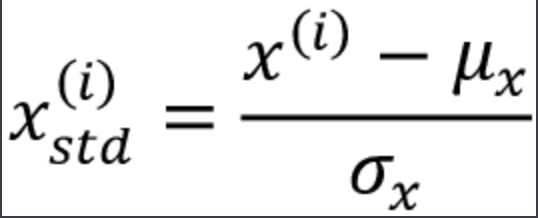

**Normalization**
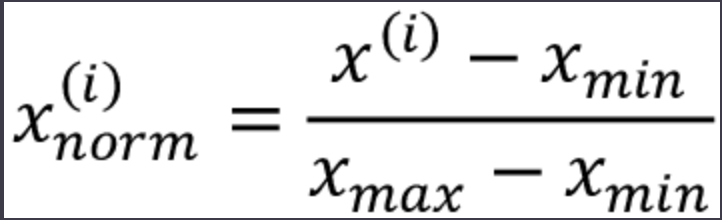

In [28]:
# manual standardization and normalization
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [29]:
# scikit-learn class for standardization implementation
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

L1 regularization using scikit-learn

In [30]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1',
                    solver='liblinear',
                    multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [31]:
lr = LogisticRegression(penalty='l1',
                         C=1.0,
                         solver='liblinear',
                         multi_class='ovr')
# C=1.0 is default, we can control C value
# more the C value stronger the regularization and vice-versa
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
lr.intercept_

array([-1.26359093, -1.21588476, -2.37036558])

In [33]:
lr.coef_
# In scikit-learn, intercept_ corresponds to the bias unit
# and coef_ corresponds to the values wj.

array([[ 1.24618925,  0.18013851,  0.7461985 , -1.16405629,  0.        ,
         0.        ,  1.15990847,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55660425,  2.50917641],
       [-1.53668465, -0.38737619, -0.9953444 ,  0.36511034, -0.05952536,
         0.        ,  0.66817287,  0.        ,  0.        , -1.93434868,
         1.23339003,  0.        , -2.23221234],
       [ 0.13562247,  0.16843007,  0.35723247,  0.        ,  0.        ,
         0.        , -2.43796089,  0.        ,  0.        ,  1.56368646,
        -0.81896856, -0.49245624,  0.        ]])

# Sequential feature selection algorithms

An alternative way to reduce the complexity of the model and avoid overfitting is dimensionality reduction via feature selection, which is especially useful for unregularized models.

In [34]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
  def __init__(self, estimator, k_features,
             scoring=accuracy_score,
             test_size=0.25, random_state=1):
    self.scoring = scoring           # The function to evaluate model performance (e.g., accuracy_score)
    self.estimator = clone(estimator) # A copy of the ML model to use (e.g., LogisticRegression)
    self.k_features = k_features     # The desired number of features to end up with
    self.test_size = test_size       # Proportion of data for the internal test set (for evaluation)
    self.random_state = random_state # For reproducibility of data splitting


  def fit(self, X, y):
    # 1. Initial Data Split
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size,
                         random_state=self.random_state)

    # 2. Start with all features
    dim = X_train.shape[1] # Number of initial features
    self.indices_ = tuple(range(dim)) # Tuple of all feature indices (e.g., (0, 1, 2, ...))
    self.subsets_ = [self.indices_] # Store the current best feature subset in a list

    # 3. Calculate initial score with all features
    score = self._calc_score(X_train, y_train,
                             X_test, y_test, self.indices_)
    self.scores_ = [score] # Store the score for the full feature set

    # 4. Iterative Feature Removal Loop
    while dim > self.k_features:
        scores = []   # To store scores for all (dim-1) feature subsets in the current iteration
        subsets = []  # To store the corresponding feature subsets

        # 5. Generate and Evaluate Subsets (removing one feature at a time)
        for p in combinations(self.indices_, r=dim - 1): # p is a combination of (dim-1) features
            # Calculate score for the current subset 'p'
            score = self._calc_score(X_train, y_train,
                                     X_test, y_test, p)
            scores.append(score)
            subsets.append(p)

        # 6. Find the best performing subset for this iteration
        best = np.argmax(scores) # Index of the subset with the highest score
        self.indices_ = subsets[best] # Update the current best feature subset to this one
        self.subsets_.append(self.indices_) # Store this best subset

        # 7. Update dimension and store the best score
        dim -= 1 # One feature has been removed, so decrement the dimension count
        self.scores_.append(scores[best]) # Store the best score found in this iteration

    # 8. Store the final k_features score
    self.k_score_ = self.scores_[-1] # The score of the final k_features subset

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train) # Train the estimator on selected features of X_train
    y_pred = self.estimator.predict(X_test[:, indices]) # Make predictions on selected features of X_test
    score = self.scoring(y_test, y_pred) # Calculate the score (e.g., accuracy)
    return score

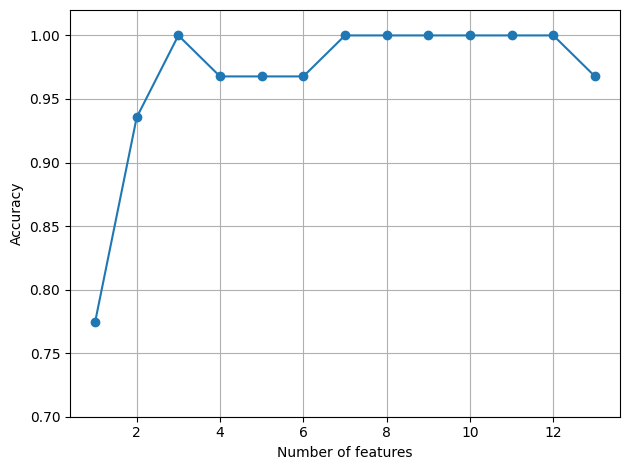

In [37]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [44]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

print("--------")
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

print("--------")
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:',knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:',knn.score(X_test_std[:, k3], y_test))

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')
--------
Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629
--------
Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


Assessing feature importance with random forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


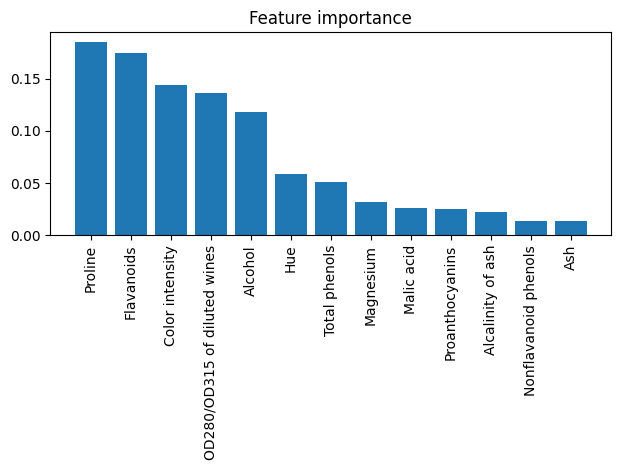

In [45]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()